In [13]:
import os
import csv
import re


model_name='glm-4v-9b'

Prometheus=[]
Dolphin=[]


# get Prometheus scores
with open('final_score/glm-4v-9b.csv', 'r' , encoding='unicode_escape') as file:
    reader = csv.reader(file)
    next(reader, None)
    for row in reader:
        try:
            score = re.findall(r'[1-5]', row[4])
            score = int(score[-1])
            Prometheus.append(score)
        except:
            score = row[4]
            print("The feedback is not in the expected format: ",score)


i = 0
# dol='dolp_scores/'+model_name+'.csv' 'prom7b_scores/glm-4v-9b.csv' 
with open('dolp_scores/glm-4v-9b.csv' , 'r') as file:
    reader = csv.reader(file)
    next(reader, None)
    for row in reader:
        i+=1
        try:
            score = re.findall(r'[1-5]', row[4])
            score = int(score[-1])
            Dolphin.append(score)
        except:
            score = (row[4].split("assistant")[-1])
            print("The feedback is not in the expected format: ",score)


print(Prometheus)
print(Dolphin)

[1, 5, 2, 5, 1, 5, 1, 5, 2, 5, 3, 4, 3, 4, 2, 1, 1, 5, 4, 4, 2, 1, 1, 2, 2, 5, 2, 2, 5, 4, 5, 3, 2, 1, 5, 4, 5, 4, 2, 3, 2, 2, 2, 4, 5, 4, 2, 5, 1, 4, 4, 1, 5, 1, 3, 1, 1, 3, 1, 4, 2, 3, 2, 2, 1, 3, 1, 4, 2, 3, 3, 1, 4, 4, 4, 1, 5, 1, 1, 2, 5, 1, 4, 1, 4, 1, 2, 1, 2, 4, 2, 3, 4, 4, 1, 3, 2, 2, 2, 1, 2, 4, 2, 4, 5, 1, 4, 2, 1]
[5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 3, 4, 4, 4, 4, 5, 5, 5, 5, 3, 5, 3, 5, 5, 4, 3, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 4, 5, 3, 5, 4, 3, 5, 5, 5, 3, 5, 5]


In [14]:
Human=[]
# h= 'results/Human.csv' 'Human/Human.csv'
with open('Human/Human.csv', 'r', encoding='unicode_escape') as file:
    reader = csv.reader(file)
    next(reader, None)
    for row in reader:
        try:
            score = row[4]
            score= int(score)
            Human.append(score)
        except:
            score = row[4]
            print("The feedback is not in the expected format: ",score)
print(Human)
# Human= [1,2,3]
# Prometheus=[1,2,3]
# Dolphin=[3,2,1]

print(len(Prometheus))
print(len(Dolphin))
print(len(Human))

[1, 3, 5, 3, 4, 5, 1, 2, 2, 5, 2, 2, 5, 5, 2, 1, 2, 5, 1, 4, 4, 2, 1, 2, 2, 5, 2, 2, 5, 4, 5, 3, 2, 1, 5, 4, 5, 4, 2, 3, 2, 2, 4, 4, 5, 2, 5, 4, 1, 5, 5, 1, 2, 2, 5, 1, 1, 3, 5, 2, 4, 5, 4, 2, 5, 5, 1, 4, 4, 4, 1, 2, 3, 1, 4, 1, 4, 3, 1, 2, 5, 1, 4, 1, 4, 1, 2, 1, 2, 4, 2, 3, 4, 4, 1, 3, 2, 2, 2, 1, 2, 4, 2, 4, 5, 1, 4, 2, 1]
109
109
109


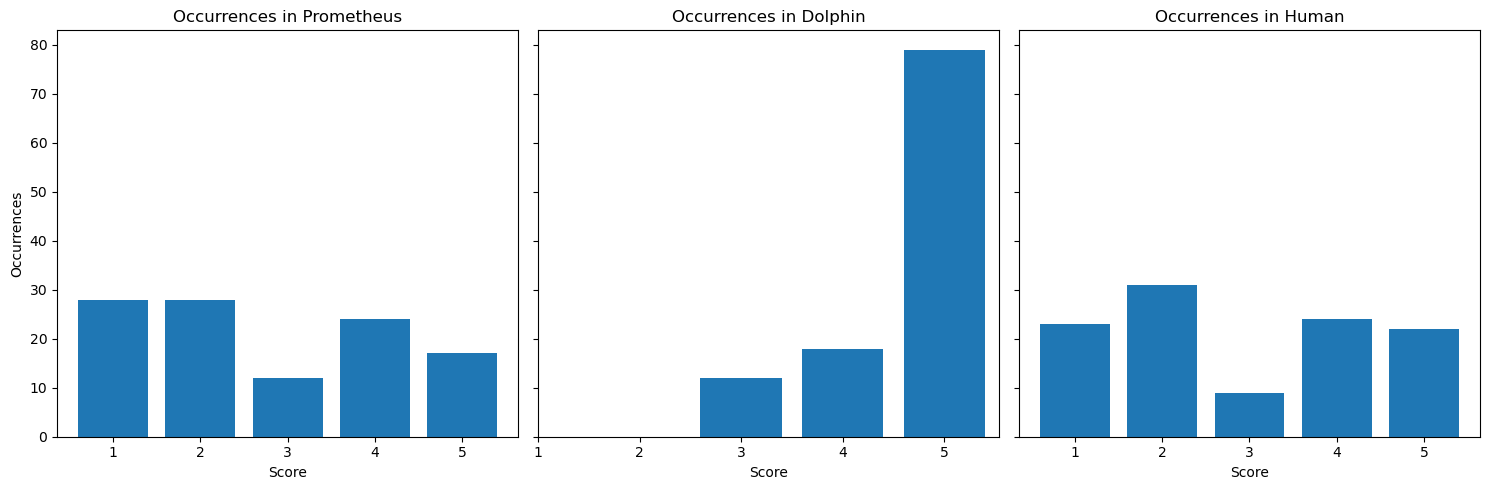

Prometheus - Mean: 2.76, Median: 2.0, Standard Deviation: 1.44, Mode: 1, Mode Count: 28
Dolphin - Mean: 4.61, Median: 5.0, Standard Deviation: 0.68, Mode: 5, Mode Count: 79
Human - Mean: 2.92, Median: 3.0, Standard Deviation: 1.47, Mode: 2, Mode Count: 31


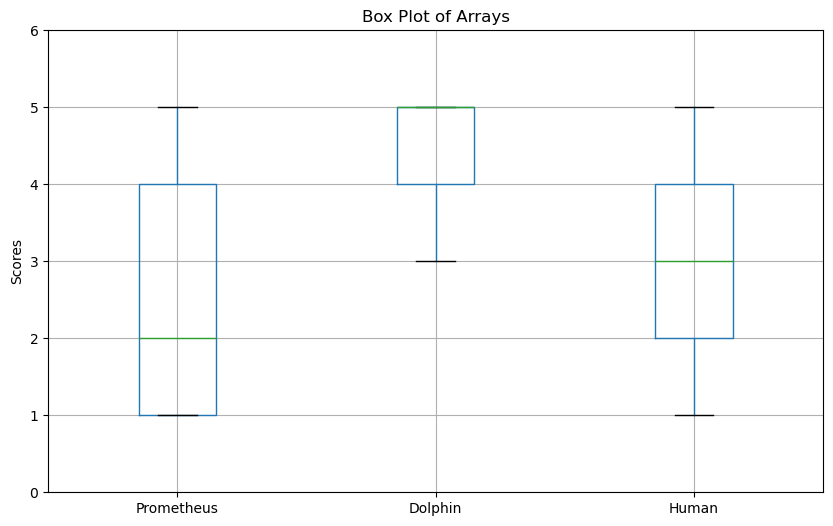

Pearson Correlation Matrix:
            Prometheus   Dolphin     Human
Prometheus    1.000000  0.056399  0.634176
Dolphin       0.056399  1.000000  0.069724
Human         0.634176  0.069724  1.000000

Kendall-Tau Correlation Matrix:
            Prometheus   Dolphin     Human
Prometheus    1.000000  0.018452  0.578853
Dolphin       0.018452  1.000000  0.048578
Human         0.578853  0.048578  1.000000

Spearman Correlation Matrix:
            Prometheus   Dolphin     Human
Prometheus    1.000000  0.022995  0.649664
Dolphin       0.022995  1.000000  0.059511
Human         0.649664  0.059511  1.000000


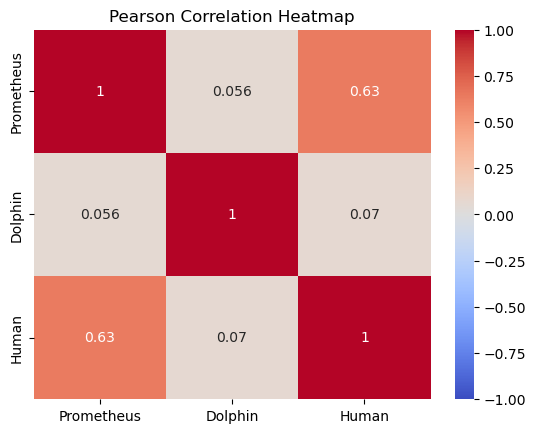

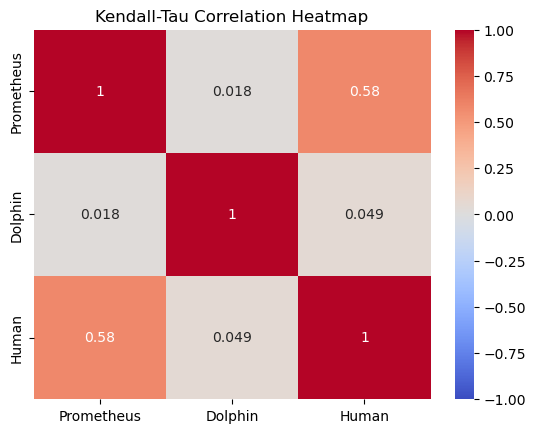

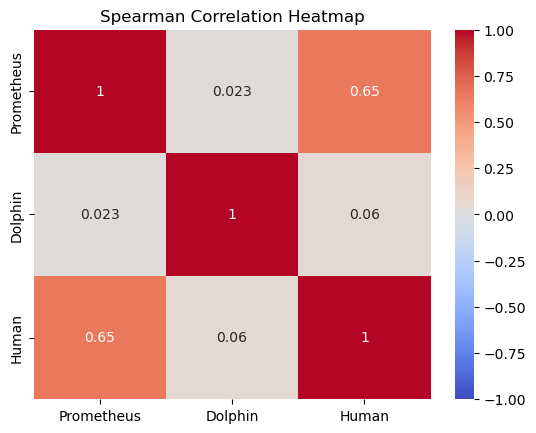

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr, kendalltau, spearmanr, mode

# Example arrays (replace these with your actual data)
# Prometheus = np.random.randint(1, 6, 100)
# Dolphin = np.random.randint(1, 6, 100)
# Human = np.random.randint(1, 6, 100)

# Function to plot occurrences side by side
def plot_occurrences_side_by_side(arrays, array_names):
    fig, axes = plt.subplots(1, len(arrays), figsize=(15, 5), sharey=True)
    for i, (arr, name) in enumerate(zip(arrays, array_names)):
        values, counts = np.unique(arr, return_counts=True)
        axes[i].bar(values, counts)
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Occurrences' if i == 0 else '')
        axes[i].set_title(f'Occurrences in {name}')
        axes[i].set_xticks(range(1, 6))
    plt.tight_layout()
    plt.show()

# Function to print statistics including mode
def print_statistics(arr, array_name):
    mean = np.mean(arr)
    median = np.median(arr)
    std_dev = np.std(arr)
    mode_value, mode_count = mode(arr, keepdims=False)
    print(f"{array_name} - Mean: {mean:.2f}, Median: {median}, Standard Deviation: {std_dev:.2f}, Mode: {mode_value}, Mode Count: {mode_count}")
    return mean, median, std_dev, mode_value

# Plot occurrences and print statistics for each array
arrays = [Prometheus, Dolphin, Human]
array_names = ['Prometheus', 'Dolphin', 'Human']
plot_occurrences_side_by_side(arrays, array_names)
for arr, name in zip(arrays, array_names):
    print_statistics(arr, name)

# Combined box plot using pandas
data = pd.DataFrame({
    'Prometheus': Prometheus,
    'Dolphin': Dolphin,
    'Human': Human
})

plt.figure(figsize=(10, 6))
data.boxplot(column=['Prometheus', 'Dolphin', 'Human'])
plt.ylim(0, 6)  # Set y-axis from 0 to 6
plt.title('Box Plot of Arrays')
# plt.xlabel('Array')
plt.ylabel('Scores')
plt.show()

# Compute Pearson correlation matrix
pearson_corr = data.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Compute Kendall-Tau correlation matrix
kendall_corr = data.corr(method='kendall')
print("\nKendall-Tau Correlation Matrix:")
print(kendall_corr)

# Compute Spearman correlation matrix
spearman_corr = data.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Function to plot heatmap
def plot_heatmap(corr_matrix, title):
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot heatmaps for each correlation matrix
plot_heatmap(pearson_corr, 'Pearson Correlation Heatmap')
plot_heatmap(kendall_corr, 'Kendall-Tau Correlation Heatmap')
plot_heatmap(spearman_corr, 'Spearman Correlation Heatmap')


# Results 

In [8]:
import os
import csv
import re

glm_4v_9b = []
cogvlm2 = []
internlm_xcomposer2 =[]
Mini_InternVL_Chat_2B_V1_5 =[]
Mini_InternVL_Chat_4B_V1_5 = []
MiniCPM_Llama3_V_2_5 = []
names= ['glm-4v-9b','cogvlm2','internlm-xcomposer2','Mini-InternVL-Chat-2B-V1-5','Mini-InternVL-Chat-4B-V1-5','MiniCPM-Llama3-V-2_5']
models= [glm_4v_9b, cogvlm2,internlm_xcomposer2 ,Mini_InternVL_Chat_2B_V1_5 ,Mini_InternVL_Chat_4B_V1_5 , MiniCPM_Llama3_V_2_5 ]
for name,model in zip(names,models): 
    with open('final_score/'+name+'.csv' , 'r') as file:
        reader = csv.reader(file)
        next(reader, None)
        for row in reader:
            try:
                score = re.findall(r'[1-5]', row[4])
                score = int(score[-1])
                model.append(score)
            except:
                score = (row[4].split("assistant")[-1])
                print("The feedback is not in the expected format: ",score)

print(models)

[[1, 5, 2, 5, 1, 5, 1, 5, 2, 5, 3, 4, 3, 4, 2, 1, 1, 5, 4, 4, 2, 1, 1, 2, 2, 5, 2, 2, 5, 4, 5, 3, 2, 1, 5, 4, 5, 4, 2, 3, 2, 2, 2, 4, 5, 4, 2, 5, 1, 4, 4, 1, 5, 1, 3, 1, 1, 3, 1, 4, 2, 3, 2, 2, 1, 3, 1, 4, 2, 3, 3, 1, 4, 4, 4, 1, 5, 1, 1, 2, 5, 1, 4, 1, 4, 1, 2, 1, 2, 4, 2, 3, 4, 4, 1, 3, 2, 2, 2, 1, 2, 4, 2, 4, 5, 1, 4, 2, 1], [2, 5, 2, 3, 4, 3, 1, 4, 2, 4, 1, 3, 4, 2, 3, 1, 1, 3, 4, 3, 1, 3, 4, 5, 2, 5, 2, 1, 4, 3, 1, 2, 3, 1, 2, 4, 2, 3, 1, 1, 2, 4, 2, 2, 2, 2, 4, 5, 4, 1, 4, 3, 5, 4, 1, 2, 4, 3, 1, 3, 2, 4, 2, 1, 1, 3, 1, 4, 3, 2, 3, 4, 1, 5, 4, 3, 1, 5, 3, 1, 4, 2, 3, 5, 3, 5, 2, 1, 1, 1, 2, 4, 2, 1, 3, 3, 2, 2, 3, 3, 1, 4, 5, 5, 3, 1, 1, 1, 2], [5, 5, 5, 4, 1, 1, 1, 1, 2, 2, 1, 5, 3, 2, 2, 1, 1, 5, 4, 2, 2, 2, 1, 1, 4, 1, 1, 4, 3, 3, 1, 3, 5, 2, 5, 2, 2, 2, 1, 1, 3, 1, 2, 3, 2, 5, 1, 4, 1, 2, 5, 2, 4, 3, 2, 1, 4, 4, 1, 4, 2, 1, 2, 2, 1, 1, 1, 2, 2, 4, 1, 1, 2, 3, 5, 1, 2, 2, 2, 2, 5, 5, 2, 1, 5, 1, 2, 1, 1, 2, 4, 1, 3, 2, 4, 2, 1, 4, 1, 3, 1, 3, 1, 1, 2, 1, 3, 2, 3], [1, 1, 2, 2,

glm-4v-9b - Mean: 2.76, Median: 2.0, Standard Deviation: 1.44, Mode: 1, Mode Count: 28
cogvlm2 - Mean: 2.67, Median: 3.0, Standard Deviation: 1.31, Mode: 1, Mode Count: 27
internlm-xcomposer2 - Mean: 2.38, Median: 2.0, Standard Deviation: 1.37, Mode: 1, Mode Count: 37
Mini-InternVL-Chat-2B-V1-5 - Mean: 1.87, Median: 1.0, Standard Deviation: 1.12, Mode: 1, Mode Count: 56
Mini-InternVL-Chat-4B-V1-5 - Mean: 2.28, Median: 2.0, Standard Deviation: 1.31, Mode: 1, Mode Count: 41
MiniCPM-Llama3-V-2_5 - Mean: 2.56, Median: 2.0, Standard Deviation: 1.12, Mode: 2, Mode Count: 33


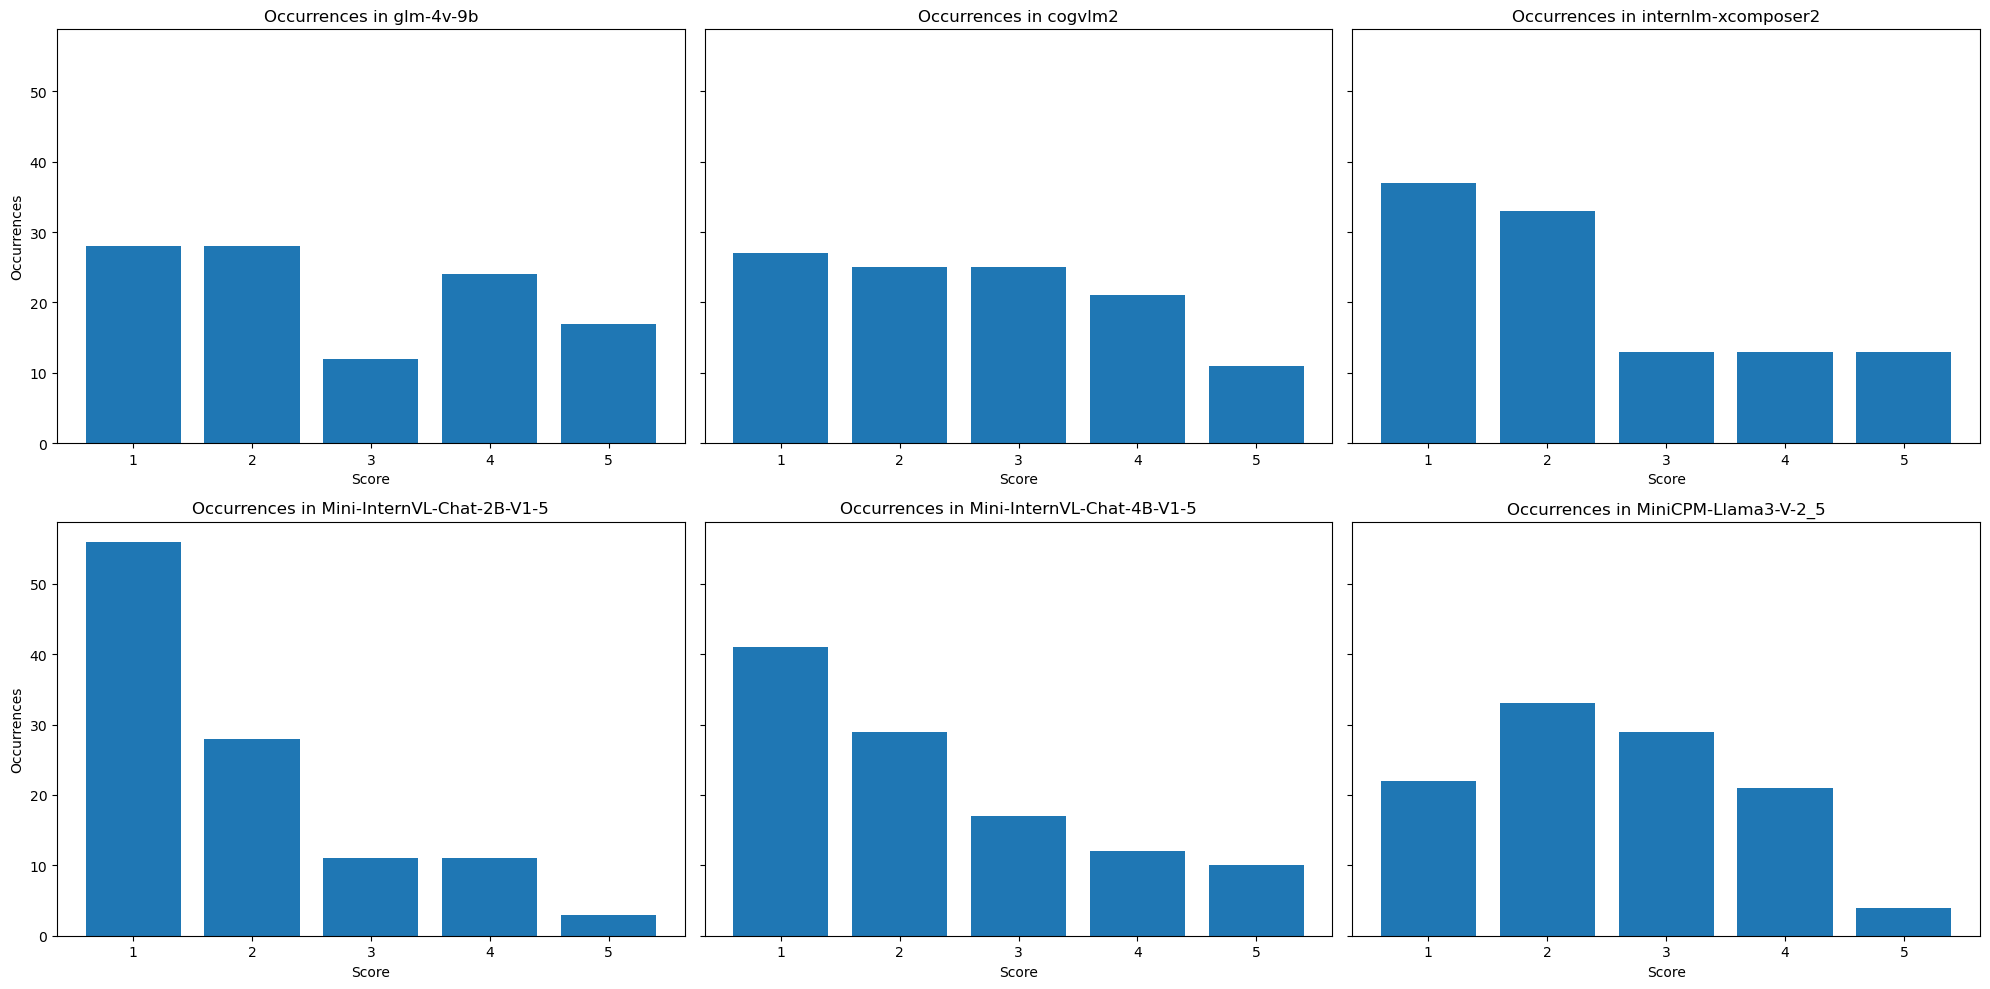

[1, 5, 2, 5, 1, 5, 1, 5, 2, 5, 3, 4, 3, 4, 2, 1, 1, 5, 4, 4, 2, 1, 1, 2, 2, 5, 2, 2, 5, 4, 5, 3, 2, 1, 5, 4, 5, 4, 2, 3, 2, 2, 2, 4, 5, 4, 2, 5, 1, 4, 4, 1, 5, 1, 3, 1, 1, 3, 1, 4, 2, 3, 2, 2, 1, 3, 1, 4, 2, 3, 3, 1, 4, 4, 4, 1, 5, 1, 1, 2, 5, 1, 4, 1, 4, 1, 2, 1, 2, 4, 2, 3, 4, 4, 1, 3, 2, 2, 2, 1, 2, 4, 2, 4, 5, 1, 4, 2, 1]


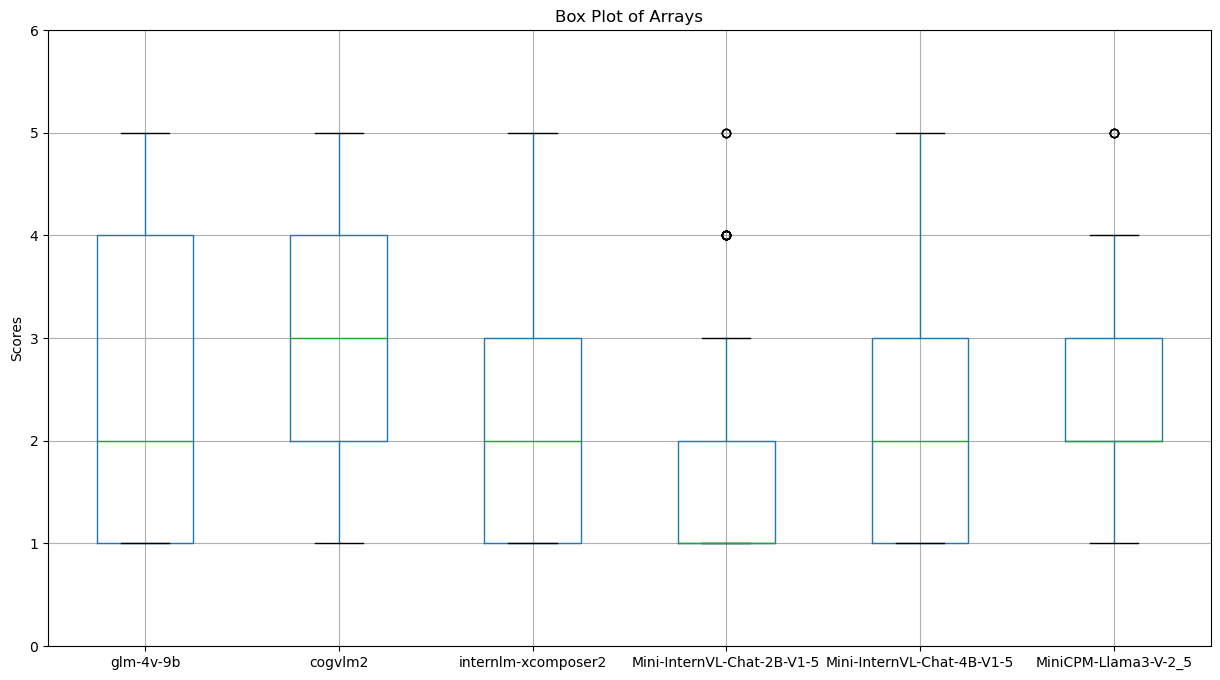

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Function to print statistics including mode
def print_statistics(arr, array_name):
    mean = np.mean(arr)
    median = np.median(arr)
    std_dev = np.std(arr)
    mode_value, mode_count = mode(arr, keepdims=False)
    print(f"{array_name} - Mean: {mean:.2f}, Median: {median}, Standard Deviation: {std_dev:.2f}, Mode: {mode_value}, Mode Count: {mode_count}")
    return mean, median, std_dev, mode_value

# Print statistics for each array
arrays = [glm_4v_9b, cogvlm2, internlm_xcomposer2, Mini_InternVL_Chat_2B_V1_5, Mini_InternVL_Chat_4B_V1_5, MiniCPM_Llama3_V_2_5]
array_names = ['glm-4v-9b', 'cogvlm2', 'internlm-xcomposer2', 'Mini-InternVL-Chat-2B-V1-5', 'Mini-InternVL-Chat-4B-V1-5', 'MiniCPM-Llama3-V-2_5']
for arr, name in zip(arrays, array_names):
    print_statistics(arr, name)

# Function to plot occurrences with 3 per row
def plot_occurrences_side_by_side(arrays, array_names):
    num_arrays = len(arrays)
    num_cols = 3
    num_rows = (num_arrays + num_cols - 1) // num_cols  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), sharey=True)
    
    # Flatten axes array for easy indexing
    axes = axes.flatten()
    
    for i, (arr, name) in enumerate(zip(arrays, array_names)):
        values, counts = np.unique(arr, return_counts=True)
        axes[i].bar(values, counts)
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Occurrences' if i % num_cols == 0 else '')
        axes[i].set_title(f'Occurrences in {name}')
        axes[i].set_xticks(range(1, 6))
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot occurrences
plot_occurrences_side_by_side(arrays, array_names)

print(glm_4v_9b)
# Combined box plot using pandas
data = pd.DataFrame({
    'glm-4v-9b': glm_4v_9b,
    'cogvlm2': cogvlm2,
    'internlm-xcomposer2': internlm_xcomposer2,
    'Mini-InternVL-Chat-2B-V1-5': Mini_InternVL_Chat_2B_V1_5,
    'Mini-InternVL-Chat-4B-V1-5': Mini_InternVL_Chat_4B_V1_5,
    'MiniCPM-Llama3-V-2_5': MiniCPM_Llama3_V_2_5
})

plt.figure(figsize=(15, 8))
data.boxplot(column=['glm-4v-9b', 'cogvlm2', 'internlm-xcomposer2', 'Mini-InternVL-Chat-2B-V1-5', 'Mini-InternVL-Chat-4B-V1-5', 'MiniCPM-Llama3-V-2_5'])
plt.ylim(0, 6)  # Set y-axis from 0 to 6
plt.title('Box Plot of Arrays')
# plt.xlabel('Array')
plt.ylabel('Scores')
plt.show()
